In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer
plt.style.use('seaborn')
plt.style.use('matplotlibrc.py')

Using TensorFlow backend.


In [2]:
seed = 7
np.random.seed(seed)

In [3]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
def graph_predictions(l,df_original,y_train_pr,y_test_pr):
    plt.plot(df_original) 
    months_tr = np.arange(l,len(y_train_pr)+l) #meses de training
    months_ts = np.arange(len(y_train_pr)+(2*l)+1,len(df_original)-1) #meses de testing
    plt.plot(months_tr,y_train_pr,label='train') #grafico de train results
    plt.plot(months_ts,y_test_pr,label='test') #grafico de test results
    plt.xlabel('Meses')
    plt.ylabel('Pasajeros')
    plt.legend()
    plt.savefig('caba_6.pdf')
    plt.show()

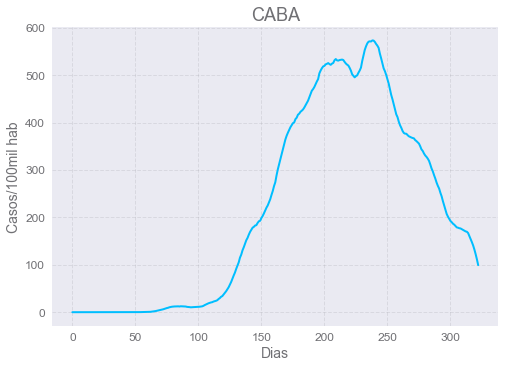

In [5]:
file_dir = 'Datos/RiesgoCABACABANA'
data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
data = data["incidenciaAcum14d"]
df = pd.DataFrame(data)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.title('CABA')
plt.plot(df)
df = df.to_numpy()
df1 = df[-20:-10]
df = df[:-20]
df_original = np.copy(df)
df = df.flatten()
scaler = MinMaxScaler(feature_range=(0, 1))

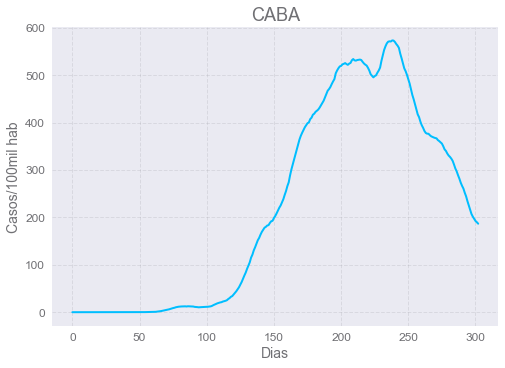

In [6]:
plt.plot(df)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.title('CABA')
plt.savefig('caba_1.pdf')

In [7]:
total_size = df.shape[0]
train_size = int(0.8*total_size)
test_size = total_size - train_size
train_data = df[:-test_size]
test_data = df[-test_size:]

In [8]:
print('Data train size: ',train_size)
print('Data test size: ',test_size)

Data train size:  242
Data test size:  61


In [9]:
tw = 3
train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
x_train, y_train = create_dataset(train_data_scaled, tw)
x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))
x_test, y_test = create_dataset(test_data_scaled, tw)
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [10]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=8,activation='relu',input_shape=(1,tw)))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['mse']) 
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=8,verbose=2) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 384       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________
Train on 238 samples, validate on 57 samples
Epoch 1/500
 - 1s - loss: 0.2700 - mse: 0.2700 - val_loss: 0.4047 - val_mse: 0.4047
Epoch 2/500
 - 0s - loss: 0.2413 - mse: 0.2413 - val_loss: 0.3634 - val_mse: 0.3634
Epoch 3/500
 - 0s - loss: 0.2209 - mse: 0.2209 - val_loss: 0.3262 - val_mse: 0.3262
Epoch 4/500
 - 0s - loss: 0.2027 - mse: 0.2027 - val_loss: 0.2954 - val_mse: 0.2954
Epoch 5/500
 - 0s - loss: 0.1871 - mse: 0.1871 - val_loss: 0.2669 - val_mse: 0.2669
Epoch 6/500
 - 0s - loss: 0.1726 - mse: 0.1726 - val_

Epoch 88/500
 - 0s - loss: 3.0626e-04 - mse: 3.0626e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 89/500
 - 0s - loss: 2.9221e-04 - mse: 2.9221e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 90/500
 - 0s - loss: 2.8719e-04 - mse: 2.8719e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 91/500
 - 0s - loss: 2.6821e-04 - mse: 2.6821e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 92/500
 - 0s - loss: 2.6402e-04 - mse: 2.6402e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 93/500
 - 0s - loss: 2.5146e-04 - mse: 2.5146e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 94/500
 - 0s - loss: 2.4546e-04 - mse: 2.4546e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 95/500
 - 0s - loss: 2.3600e-04 - mse: 2.3600e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 96/500
 - 0s - loss: 2.3554e-04 - mse: 2.3554e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 97/500
 - 0s - loss: 2.3291e-04 - mse: 2.3291e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 98/500
 - 0s - loss: 2.1952e-04 - mse: 2.1952e-04 - val_loss: 0.

Epoch 176/500
 - 0s - loss: 6.1405e-05 - mse: 6.1405e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 177/500
 - 0s - loss: 6.6258e-05 - mse: 6.6258e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 178/500
 - 0s - loss: 6.3204e-05 - mse: 6.3204e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 179/500
 - 0s - loss: 6.6003e-05 - mse: 6.6003e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 180/500
 - 0s - loss: 6.2425e-05 - mse: 6.2425e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 181/500
 - 0s - loss: 7.9641e-05 - mse: 7.9641e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 182/500
 - 0s - loss: 7.5047e-05 - mse: 7.5047e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 183/500
 - 0s - loss: 7.2887e-05 - mse: 7.2887e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 184/500
 - 0s - loss: 6.4076e-05 - mse: 6.4076e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 185/500
 - 0s - loss: 7.0714e-05 - mse: 7.0714e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 186/500
 - 0s - loss: 6.5689e-05 - mse: 6.5689e-05 - v

Epoch 263/500
 - 0s - loss: 4.2660e-05 - mse: 4.2660e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 264/500
 - 0s - loss: 4.5797e-05 - mse: 4.5797e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 265/500
 - 0s - loss: 4.8494e-05 - mse: 4.8494e-05 - val_loss: 9.9451e-04 - val_mse: 9.9451e-04
Epoch 266/500
 - 0s - loss: 5.0902e-05 - mse: 5.0902e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 267/500
 - 0s - loss: 5.1134e-05 - mse: 5.1134e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 268/500
 - 0s - loss: 4.3986e-05 - mse: 4.3986e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 269/500
 - 0s - loss: 4.8169e-05 - mse: 4.8169e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 270/500
 - 0s - loss: 4.4204e-05 - mse: 4.4204e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 271/500
 - 0s - loss: 4.7535e-05 - mse: 4.7535e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 272/500
 - 0s - loss: 4.3231e-05 - mse: 4.3231e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 273/500
 - 0s - loss: 5.0746e-05 - mse: 5.0746

Epoch 346/500
 - 0s - loss: 3.8235e-05 - mse: 3.8235e-05 - val_loss: 9.0821e-04 - val_mse: 9.0821e-04
Epoch 347/500
 - 0s - loss: 3.5062e-05 - mse: 3.5062e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 348/500
 - 0s - loss: 3.8828e-05 - mse: 3.8828e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 349/500
 - 0s - loss: 3.6450e-05 - mse: 3.6450e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 350/500
 - 0s - loss: 3.8796e-05 - mse: 3.8796e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 351/500
 - 0s - loss: 3.8165e-05 - mse: 3.8165e-05 - val_loss: 6.3375e-04 - val_mse: 6.3375e-04
Epoch 352/500
 - 0s - loss: 3.6721e-05 - mse: 3.6721e-05 - val_loss: 8.3599e-04 - val_mse: 8.3599e-04
Epoch 353/500
 - 0s - loss: 3.6918e-05 - mse: 3.6918e-05 - val_loss: 7.4504e-04 - val_mse: 7.4504e-04
Epoch 354/500
 - 0s - loss: 3.3822e-05 - mse: 3.3822e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 355/500
 - 0s - loss: 3.5989e-05 - mse: 3.5989e-05 - val_loss: 8.4212e-04 - val_mse: 8.4212e-04
Epoch 356/500
 - 0s 

Epoch 428/500
 - 0s - loss: 3.3578e-05 - mse: 3.3578e-05 - val_loss: 6.6477e-04 - val_mse: 6.6477e-04
Epoch 429/500
 - 0s - loss: 3.1061e-05 - mse: 3.1061e-05 - val_loss: 5.2695e-04 - val_mse: 5.2695e-04
Epoch 430/500
 - 0s - loss: 3.0436e-05 - mse: 3.0436e-05 - val_loss: 9.1115e-04 - val_mse: 9.1115e-04
Epoch 431/500
 - 0s - loss: 3.6373e-05 - mse: 3.6373e-05 - val_loss: 6.9069e-04 - val_mse: 6.9069e-04
Epoch 432/500
 - 0s - loss: 3.1980e-05 - mse: 3.1980e-05 - val_loss: 6.4770e-04 - val_mse: 6.4770e-04
Epoch 433/500
 - 0s - loss: 2.8464e-05 - mse: 2.8464e-05 - val_loss: 8.8221e-04 - val_mse: 8.8221e-04
Epoch 434/500
 - 0s - loss: 3.0010e-05 - mse: 3.0010e-05 - val_loss: 4.8015e-04 - val_mse: 4.8015e-04
Epoch 435/500
 - 0s - loss: 3.4968e-05 - mse: 3.4968e-05 - val_loss: 6.0788e-04 - val_mse: 6.0788e-04
Epoch 436/500
 - 0s - loss: 3.4957e-05 - mse: 3.4957e-05 - val_loss: 5.6723e-04 - val_mse: 5.6723e-04
Epoch 437/500
 - 0s - loss: 3.1856e-05 - mse: 3.1856e-05 - val_loss: 6.4786e-04 - 

In [11]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [12]:
print('train mse squared:',mean_squared_error(y_train,train_predict))
print('test mse squared:',mean_squared_error(y_test,test_predict)) 

train mse squared: 2.4837666092822876e-05
test mse squared: 0.0005299921792893581


In [13]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

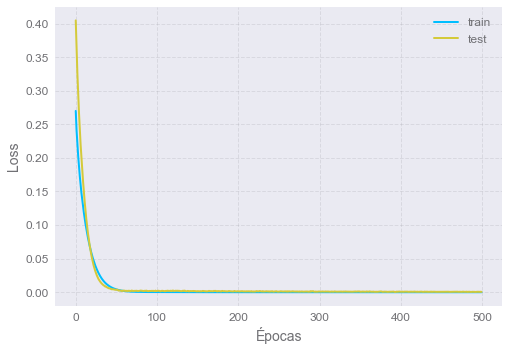

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(fontsize=12)
plt.savefig('caba_2.pdf')

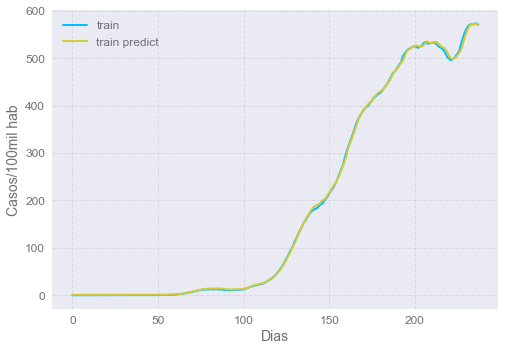

In [15]:
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),label='train')
plt.plot(train_predict,label='train predict')
plt.legend(fontsize=12)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.savefig('caba_3.pdf')

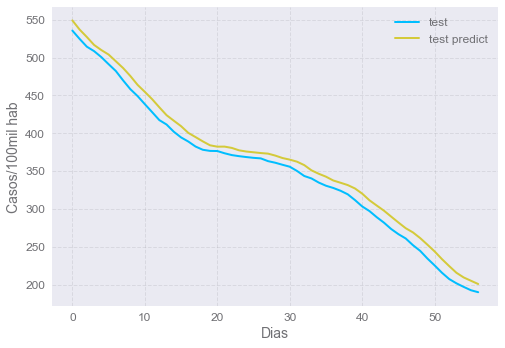

In [16]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),label='test')
plt.plot(test_predict,label='test predict')
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.legend(fontsize=12)
plt.savefig('caba_4.pdf')

In [17]:
print('train mse squared:',mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))
print('test mse squared:',mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict)) 

train mse squared: 8.163759366485435
test mse squared: 174.20037526900228


In [18]:
print(x_train.shape)

(238, 1, 3)


In [19]:
n = len(test_data_scaled)
lag = tw
x_input=test_data_scaled[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<10): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, lag))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, lag))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[0.34838176]]
2 day output [[0.36355293]]
3 day output [[0.37508214]]
4 day output [[0.3894632]]
5 day output [[0.40207654]]
6 day output [[0.4159032]]
7 day output [[0.4288736]]
8 day output [[0.44232714]]
9 day output [[0.45532566]]


In [20]:
lst_output = scaler.inverse_transform(lst_output)

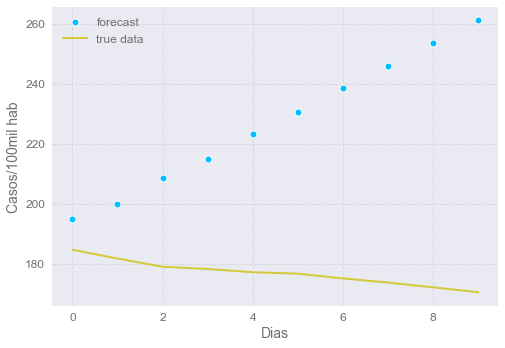

In [21]:
plt.plot(lst_output,'o',label='forecast')
plt.plot(df1,label='true data')
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.legend(fontsize=12)
plt.savefig('caba_5.pdf')

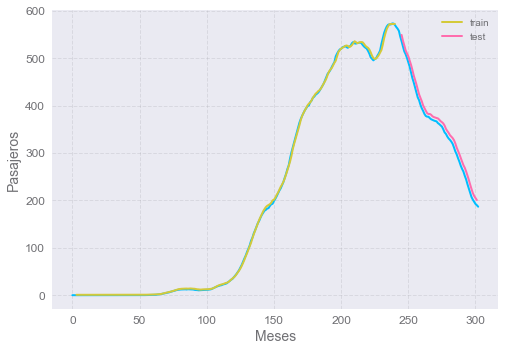

In [22]:
graph_predictions(tw,df_original,train_predict,test_predict)